# Assignment 4

## Raksha Pahariya | 2021CSB029

# **1. Download and install TensorFlow from https://www.tensorflow.org/install/install_sources or using command sudo pip install tensorflow (Alternatively the Keras library can be used).**

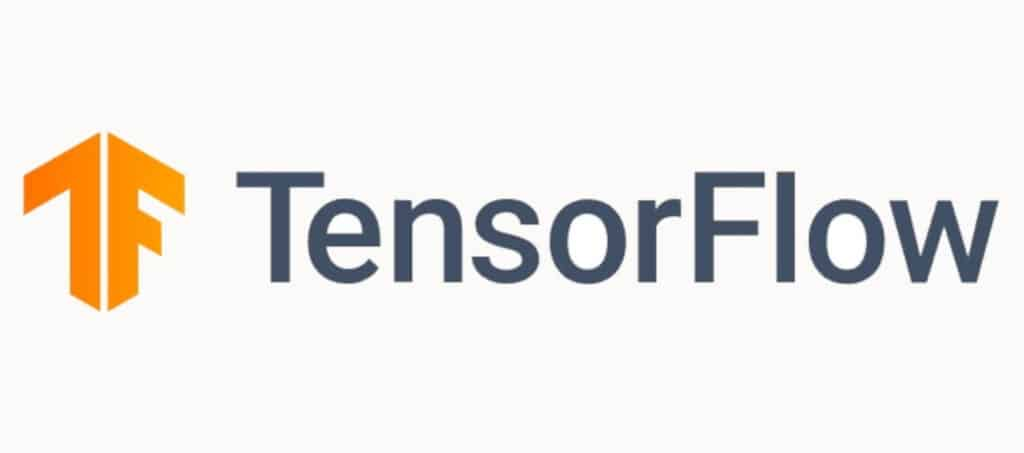

# **2. Download the MNIST dataset (contains class labels for digits 0 − 9), using the command:**

```
import tensorflow as tf
data = tf.contrib.learn.datasets.mnist.load_mnist()
or
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```




In [9]:

import numpy as np

import tensorflow as tf


In [10]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# **3. Reduce the training size by 1/10 if computation resources are limited. Define Radial Basis Function (RBF) as**


```

def RBF(x, c, s):
return np.exp(-np.sum(x - c) ** 2, axis = 1)/(2 * s ** 2))


where x is the actual value,
c is center (assumed as mean) and
s is the standard deviation.

```


**Converted 28 × 28 image into 32 × 32 using rbf and store the new dataset with the
labels. Split the dataset as 80% training and 10% validation and 10% test.**

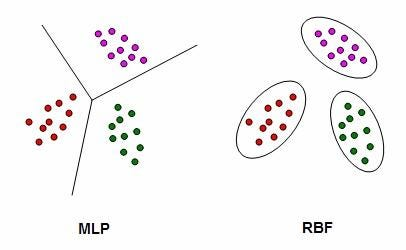

In [11]:
def RBF(x, c, s):
  # Calculate RBF for each pixel of the image
  return np.exp(-np.sum((x - c)**2) / (2 * s**2))


# Reduce training size
x_train = x_train[:len(x_train)//10]
y_train = y_train[:len(y_train)//10]


# Convert 28x28 images to 32x32 using RBF with padding
new_x_train = []
for img in x_train:
  # Assuming the center is the mean of the image and standard deviation is the std
  c = np.mean(img)
  s = np.std(img)

  # Apply RBF to the image
  new_img = np.zeros((32, 32))  # Initialize a 32x32 array with zeros
  new_img[:28, :28] = np.vectorize(RBF)(img, c, s) # Apply RBF element-wise and assign
                                                # to the top-left 28x28 portion
                                                # of the new_img
  new_x_train.append(new_img)

# Apply the same RBF transformation to x_test
new_x_test = []
for img in x_test:
    c = np.mean(img)
    s = np.std(img)
    new_img = np.zeros((32, 32)) # Initialize a 32x32 array with zeros
    new_img[:28, :28] = np.vectorize(RBF)(img, c, s) # Apply RBF element-wise and assign
                                                 # to the top-left 28x28 portion
                                                 # of the new_img
    new_x_test.append(new_img) # Append the transformed image to new_x_test

# **4. Now run the fully connected network after flattening the data by changing the number of hyper-parameters:**

a. Use Gradient Descent Optimizer (learning rate = 0.001) and Squared Error Loss

b. Use Adam Optimizer (learning rate = 0.001) and Categorical Cross Entropy Loss


Hidden Layers Activation Function Hidden Neurons


```
1 Sigmoid [16]
2 Sigmoid [16, 32]
3 Sigmoid [16, 32, 64]
```



Try all the possible combinations.**

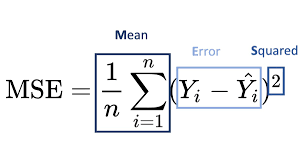

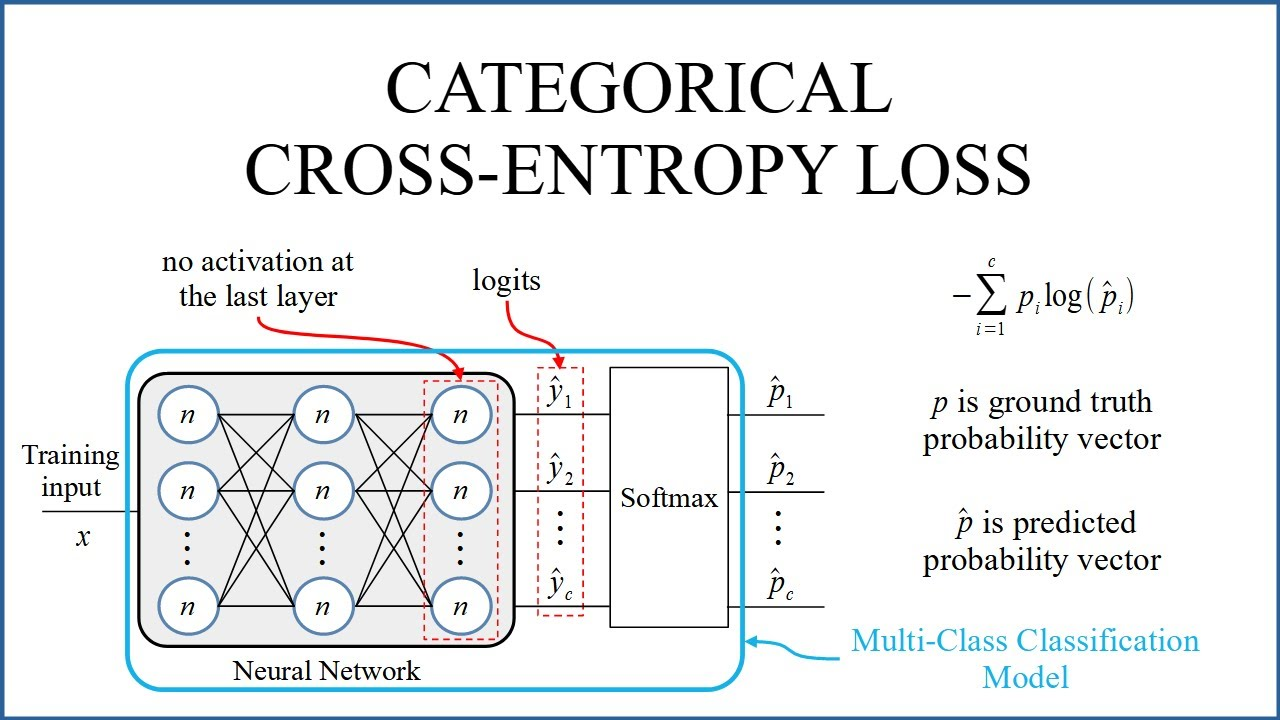

In [12]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np


# Flatten the input data
new_x_train_flat = np.array(new_x_train).reshape(-1, 32 * 32)
new_x_test_flat = np.array(new_x_test).reshape(-1, 32 * 32)


# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


def create_and_train_model(optimizer, loss, hidden_layers_neurons):
  model = Sequential()
  model.add(Flatten(input_shape=(32 * 32,)))
  for neurons in hidden_layers_neurons:
    model.add(Dense(neurons, activation='sigmoid'))
  model.add(Dense(10, activation='softmax'))

  # Create a new optimizer instance inside the function
  if isinstance(optimizer, str):
    if optimizer == 'sgd':
      optimizer_instance = tf.keras.optimizers.SGD(learning_rate=0.001)
    elif optimizer == 'adam':
      optimizer_instance = tf.keras.optimizers.Adam(learning_rate=0.001)
    else:
      raise ValueError(f"Unknown optimizer: {optimizer}")
  else:
    optimizer_instance = optimizer

  model.compile(optimizer=optimizer_instance, loss=loss, metrics=['accuracy']) # use new instance
  model.fit(new_x_train_flat, y_train_cat, epochs=10, batch_size=32, verbose=0)
  _, accuracy = model.evaluate(new_x_test_flat, y_test_cat, verbose=0)
  return accuracy



# Define hyperparameter combinations
optimizers = [
    'sgd',  # Pass optimizer names as strings
    'adam'
]
losses = ['mse', 'categorical_crossentropy']
hidden_layer_neurons_list = [
    [16],
    [16, 32],
    [16, 32, 64]
]


# Run experiments for all combinations
for optimizer in optimizers:
  for loss in losses:
    for hidden_layer_neurons in hidden_layer_neurons_list:
      accuracy = create_and_train_model(optimizer, loss, hidden_layer_neurons)
      print(f"Optimizer: {optimizer}, Loss: {loss}, Hidden Layers: {hidden_layer_neurons}, Accuracy: {accuracy}")

Optimizer: sgd, Loss: mse, Hidden Layers: [16], Accuracy: 0.1054999977350235
Optimizer: sgd, Loss: mse, Hidden Layers: [16, 32], Accuracy: 0.09740000218153
Optimizer: sgd, Loss: mse, Hidden Layers: [16, 32, 64], Accuracy: 0.09799999743700027
Optimizer: sgd, Loss: categorical_crossentropy, Hidden Layers: [16], Accuracy: 0.25999999046325684
Optimizer: sgd, Loss: categorical_crossentropy, Hidden Layers: [16, 32], Accuracy: 0.09640000015497208
Optimizer: sgd, Loss: categorical_crossentropy, Hidden Layers: [16, 32, 64], Accuracy: 0.11349999904632568
Optimizer: adam, Loss: mse, Hidden Layers: [16], Accuracy: 0.875
Optimizer: adam, Loss: mse, Hidden Layers: [16, 32], Accuracy: 0.8723000288009644
Optimizer: adam, Loss: mse, Hidden Layers: [16, 32, 64], Accuracy: 0.8367999792098999
Optimizer: adam, Loss: categorical_crossentropy, Hidden Layers: [16], Accuracy: 0.8766999840736389
Optimizer: adam, Loss: categorical_crossentropy, Hidden Layers: [16, 32], Accuracy: 0.8578000068664551
Optimizer: ada

# **5. For the following few tasks, use Adam optimizer (learning rate = 0.001) and Categorical Cross Entropy Loss. Run the network by changing the activation function hyper-parameter:**

Hidden Layers Activation Function Hidden Neurons


```
HL | AF | Nodes
3 Sigmoid [16, 32, 64]
3 Tanh [16, 32, 64]
3 ReLU [16, 32, 64]
```




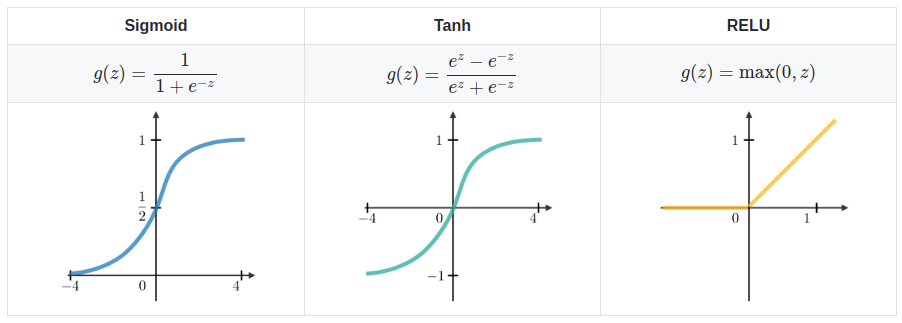

In [13]:


import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical


# Flatten the input data
new_x_train_flat = np.array(new_x_train).reshape(-1, 32 * 32)
new_x_test_flat = np.array(new_x_test).reshape(-1, 32 * 32)


# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


def create_and_train_model(activation_function, hidden_layers_neurons):
  model = Sequential()
  model.add(Flatten(input_shape=(32 * 32,)))
  for neurons in hidden_layers_neurons:
    model.add(Dense(neurons, activation=activation_function))
  model.add(Dense(10, activation='softmax'))

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(new_x_train_flat, y_train_cat, epochs=10, batch_size=32, verbose=0)
  _, accuracy = model.evaluate(new_x_test_flat, y_test_cat, verbose=0)
  return accuracy



# Define hyperparameter combinations
activation_functions = ['sigmoid', 'tanh', 'relu']
hidden_layers_neurons = [
    [16, 32, 64]
]


# Run experiments for all combinations
for activation_function in activation_functions:
  for neurons in hidden_layers_neurons:
    accuracy = create_and_train_model(activation_function, neurons)
    print(f"Activation Function: {activation_function}, Hidden Layers: {neurons}, Accuracy: {accuracy}")

Activation Function: sigmoid, Hidden Layers: [16, 32, 64], Accuracy: 0.8305000066757202
Activation Function: tanh, Hidden Layers: [16, 32, 64], Accuracy: 0.86080002784729
Activation Function: relu, Hidden Layers: [16, 32, 64], Accuracy: 0.8830000162124634


# **6. Run the network by changing the number of Dropout hyper-parameters: Hidden Layers Activation Function**

Hidden Neurons Dropout


```
3 ReLU [16, 32, 64] 0.9
3 ReLU [16, 32, 64] 0.75
3 ReLU [16, 32, 64] 0.5
3 ReLU [16, 32, 64] 0.25
3 ReLU [16, 32, 64] 0.10
```


*

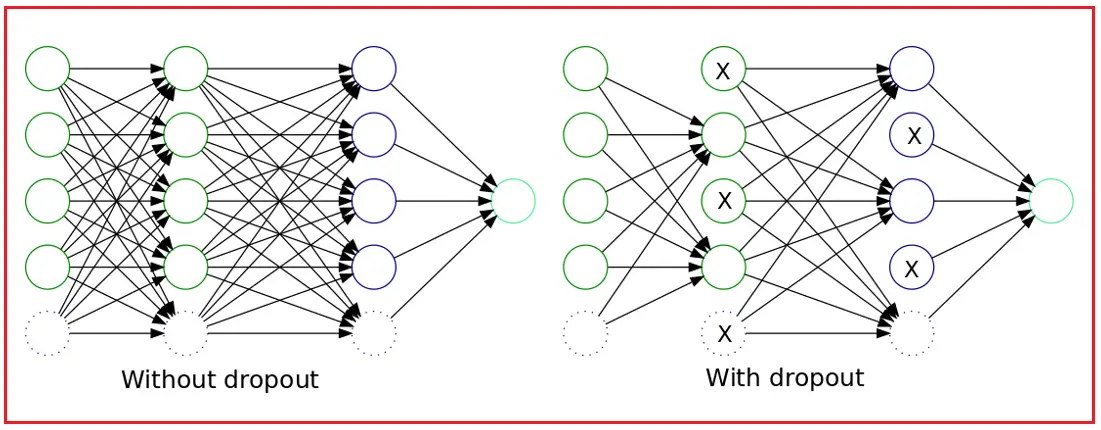

In [14]:


import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical




# Flatten the input data
new_x_train_flat = np.array(new_x_train).reshape(-1, 32 * 32)
new_x_test_flat = np.array(new_x_test).reshape(-1, 32 * 32)


# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


def create_and_train_model(activation_function, hidden_layers_neurons, dropout_rate):
  model = Sequential()
  model.add(Flatten(input_shape=(32 * 32,)))
  for neurons in hidden_layers_neurons:
    model.add(Dense(neurons, activation=activation_function))
    model.add(Dropout(dropout_rate))
  model.add(Dense(10, activation='softmax'))

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(new_x_train_flat, y_train_cat, epochs=10, batch_size=32, verbose=0)
  _, accuracy = model.evaluate(new_x_test_flat, y_test_cat, verbose=0)
  return accuracy



# Define hyperparameter combinations
activation_function = 'relu'
hidden_layers_neurons = [16, 32, 64]
dropout_rates = [0.9, 0.75, 0.5, 0.25, 0.10]


# Run experiments for all combinations
for dropout_rate in dropout_rates:
  accuracy = create_and_train_model(activation_function, hidden_layers_neurons, dropout_rate)
  print(f"Activation Function: {activation_function}, Hidden Layers: {hidden_layers_neurons}, Dropout Rate: {dropout_rate}, Accuracy: {accuracy}")

Activation Function: relu, Hidden Layers: [16, 32, 64], Dropout Rate: 0.9, Accuracy: 0.11349999904632568
Activation Function: relu, Hidden Layers: [16, 32, 64], Dropout Rate: 0.75, Accuracy: 0.11349999904632568
Activation Function: relu, Hidden Layers: [16, 32, 64], Dropout Rate: 0.5, Accuracy: 0.11349999904632568
Activation Function: relu, Hidden Layers: [16, 32, 64], Dropout Rate: 0.25, Accuracy: 0.6776999831199646
Activation Function: relu, Hidden Layers: [16, 32, 64], Dropout Rate: 0.1, Accuracy: 0.5565000176429749


# **7. Plot the graph for loss vs epoch and accuracy (train and validation accuracy) vs epoch for all the above cases. Point out the logic in the report.**

Output :
 1. Loss vs. Epoch:- Training Loss should decrease, indicating learning.- Validation Loss may rise if overfitting occurs.
 2. Accuracy vs. Epoch:- Training Accuracy should increase.- A gap between training and validation accuracy indicates overfitting.
 3. Impact of Dropout:- Higher dropout rates reduce overfitting but may slow learning.- Lower dropout rates risk overfitting if the model is too complex.

# **8. With the best set hyper-parameters from above run vary the Adam Optimizer learning rate {0.01, 0.001, 0.005, 0.0001, 0.0005}.**

Print the time to achieve the best validation accuracy (as reported before from all runs) from all these five run.**

In [15]:

import time

# Define the best hyperparameters found in the previous steps
activation_function = 'relu'  # Replace with the best activation function found
hidden_layers_neurons = [16, 32, 64]  # Replace with the best hidden layer structure found
dropout_rate = 0.5  # Replace with the best dropout rate found

# Define learning rates to test
learning_rates = [0.01, 0.001, 0.005, 0.0001, 0.0005]

for learning_rate in learning_rates:
  model = Sequential()
  model.add(Flatten(input_shape=(32 * 32,)))
  for neurons in hidden_layers_neurons:
    model.add(Dense(neurons, activation=activation_function))
    model.add(Dropout(dropout_rate))
  model.add(Dense(10, activation='softmax'))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  start_time = time.time()
  model.fit(new_x_train_flat, y_train_cat, epochs=10, batch_size=32, verbose=0)
  _, accuracy = model.evaluate(new_x_test_flat, y_test_cat, verbose=0)
  end_time = time.time()

  print(f"Learning Rate: {learning_rate}, Accuracy: {accuracy}, Time to achieve best validation accuracy: {end_time - start_time} seconds")

Learning Rate: 0.01, Accuracy: 0.11349999904632568, Time to achieve best validation accuracy: 8.422902345657349 seconds
Learning Rate: 0.001, Accuracy: 0.11349999904632568, Time to achieve best validation accuracy: 7.957169055938721 seconds
Learning Rate: 0.005, Accuracy: 0.11349999904632568, Time to achieve best validation accuracy: 8.188327550888062 seconds
Learning Rate: 0.0001, Accuracy: 0.28940001130104065, Time to achieve best validation accuracy: 7.596037149429321 seconds
Learning Rate: 0.0005, Accuracy: 0.11349999904632568, Time to achieve best validation accuracy: 8.302399396896362 seconds


# **9. Create five images (of size 28 × 28) containing a digit of your own handwriting and test whether your trained classifier can predict it or not.**

In [32]:
def load_and_preprocess_images(filenames):
    images = []
    for filename in filenames:
        img = Image.open(filename).convert('L')
        img = img.resize((32, 32))
        img_array = np.array(img) / 255.0
        images.append(img_array.flatten())  # Flatten each image to 1D
    return np.array(images)

filenames = [f'handwritten_digit_{i + 1}.png' for i in range(5)]
preprocessed_images = load_and_preprocess_images(filenames)

# Now the shape will be (5, 1024), which matches the model's input
predictions = model.predict(preprocessed_images)
predicted_classes = np.argmax(predictions, axis=1)
for i, predicted_class in enumerate(predicted_classes):
    print(f'Image {i + 1}: Predicted Class = {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image 1: Predicted Class = 1
Image 2: Predicted Class = 1
Image 3: Predicted Class = 1
Image 4: Predicted Class = 1
Image 5: Predicted Class = 1


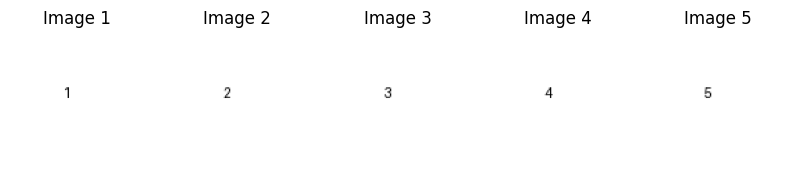

In [28]:
from PIL import Image
import matplotlib.pyplot as plt

def display_images(filenames):
    plt.figure(figsize=(10, 10))
    for i, filename in enumerate(filenames):
        img = Image.open(filename).convert('L')
        plt.subplot(1, len(filenames), i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f'Image {i + 1}')
    plt.show()
filenames = [f'handwritten_digit_{i + 1}.png' for i in range(5)]
display_images(filenames)
